## 1. Meet Dr. Ignaz Semmelweis
Dr. Ignaz Semmelweis is an Hungarian physician born in 1818 and active at the Vienna General Hospital.
Childbed fever: A deadly disease affecting women that just have given birth.
In the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. Dr. Semmelweis knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands!

In this notebook, I'm going to reanalyze the data that made Semmelweis discover the importance of handwashing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [2]:
# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

In [3]:
yearly.shape

(12, 4)

In [4]:
yearly.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [5]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [6]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"] = yearly["deaths"]/yearly["births"]
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [7]:
clinic_1 = yearly[yearly["clinic"] == "clinic 1"]
clinic_2 = yearly[yearly["clinic"] == "clinic 2"]

In [8]:
clinic_1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


## 3. Death at the clinics
<p>If we now plot the proportion of deaths at both Clinic 1 and Clinic 2  we'll see a curious pattern…</p>

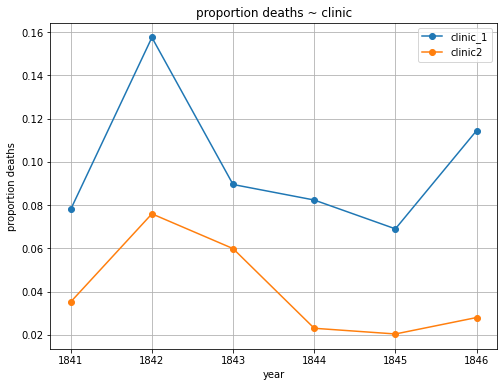

In [9]:
# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths", label="clinic_1", marker="o", figsize=(8,6))
clinic_2.plot(x="year", y="proportion_deaths", ax=ax, label="clinic2", marker="o")

plt.xlabel("year")
plt.ylabel("proportion deaths")
plt.legend()

plt.title("proportion deaths ~ clinic")
plt.grid()
plt.margins(0.05)

plt.show()

## 4. The handwashing begins
<p>Why is the proportion of deaths consistently so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [10]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

In [11]:
monthly.shape

(98, 3)

In [12]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [13]:
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [14]:
# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"]/monthly["births"]

In [15]:
# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

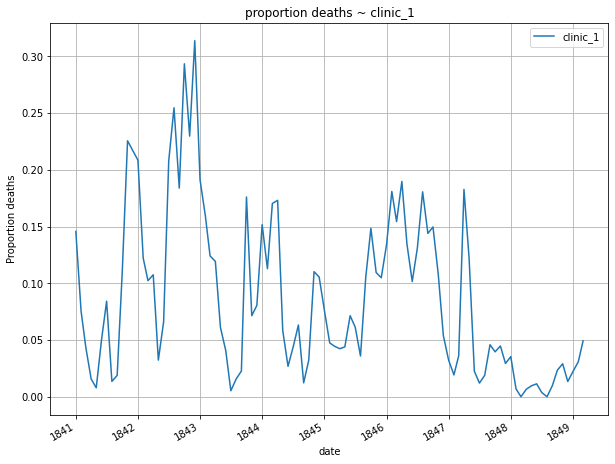

In [16]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y="proportion_deaths", label="clinic_1", figsize=(10,8))

plt.xlabel("date")
plt.ylabel("Proportion deaths")
plt.legend()

plt.title("proportion deaths ~ clinic_1")
plt.grid()
plt.margins(0.05)

plt.show()

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

In [17]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

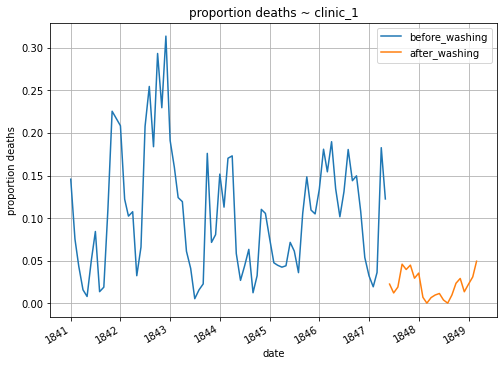

In [18]:
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths", label="before_washing", figsize=(8,6))
after_washing.plot(x="date", y="proportion_deaths", ax=ax, label="after_washing")

plt.xlabel("date")
plt.ylabel("proportion deaths")
plt.legend()

plt.title("proportion deaths ~ clinic_1")
plt.grid()
plt.margins(0.05)

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [19]:
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

In [20]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion_mean = before_proportion.mean()
after_proportion_mean = after_proportion.mean()
mean_diff = before_proportion_mean - after_proportion_mean

In [21]:
before_proportion_mean

0.10504998260908789

In [22]:
after_proportion_mean

0.021093375097254535

In [23]:
mean_diff

0.08395660751183336

## 8. A Bootstrap analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>
<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [24]:
def bootstrap_replicate_1d(data, func):
    """Generate a bootstrap replicate for 1d sample"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [25]:
#Define two empty array 
bs_replicates_before = np.empty(3000)
bs_replicates_after = np.empty(3000)

In [26]:
#Create 3000 bootstrap replicate for the mean
for i in range(3000):
    bs_replicates_before[i] = bootstrap_replicate_1d(before_proportion, np.mean)
    bs_replicates_after[i] = bootstrap_replicate_1d(after_proportion, np.mean)

In [27]:
boot_mean_diff = bs_replicates_before - bs_replicates_after
boot_mean_diff

array([0.08628359, 0.07849951, 0.09733996, ..., 0.06497871, 0.07783611,
       0.08510902])

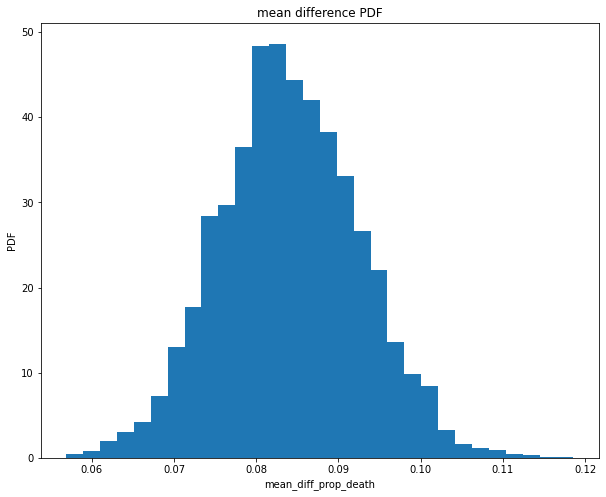

In [28]:
#Plot the histogram of the bootstrap difference 
plt.figure(figsize=(10,8))
    
plt.hist(boot_mean_diff, bins=30, density=True)

plt.xlabel("mean_diff_prop_death")
plt.ylabel("PDF")

plt.title("mean difference PDF")

plt.show()

Now i useful to summarize this result without having to resort to a graphical method like a histogram.  
To do this we can compute the 95% confidence interval of the mean.

In [29]:
# Calculating a 95% confidence interval from boot_mean_diff 
conf_int = np.percentile(boot_mean_diff, [2.5, 97.5])
conf_int

array([0.06764029, 0.10110715])

## 9. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>